In [3]:
import sklearn
from matplotlib import pyplot as plt
import numpy as np

In [4]:
from sklearn.datasets import make_classification

In [5]:
x,y = make_classification(n_classes=2, n_samples =400, n_clusters_per_class=1, random_state=3,n_features=2, n_informative=2, n_redundant=0)

In [6]:
y[y==0] = -1
y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,
       -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1, -1,  1, -1, -1

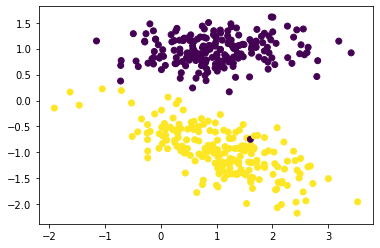

In [7]:
plt.scatter(x[:,0], x[:,1], c=y)

In [8]:
class svm:
    def __init__(self,C=1.0):
        self.C = C
        self.w=0
        self.b=0
    def hingeloss(self,w,b,x,y):
        loss = 0.0
        loss+= (0.5)*np.dot(w,w.T)
        m = x.shape[0]
        for i in range(m):
            ti = y[i]*(np.dot(w,x[i].T)+b)
            loss+= self.C*max(0,(1-ti))
        return loss
    def fit(self,x,y,batch=100, lr=0.001, maxItr = 300):
        no_of_features = x.shape[1]
        no_of_samples= x.shape[0]
        n = lr
        c = self.C
        w = np.zeros((1,no_of_features))
        bias = 0
        print(self.hingeloss(w, bias,x,y))
        losses=[]
        for i in range(maxItr):
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            l  = self.hingeloss(w,bias,x,y)
            losses.append(l)
            for batchid in range(0, no_of_samples, batch):
                gradw = 0
                gradb = 0
                for j in range(batchid, batchid+batch):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = y[i]*(np.dot(w,x[i].T)+bias)
                        if ti<=1:
                            gradw += c*y[i]*x[i]
                            gradb = c*y[i]
                        w = w- lr*w + lr*gradw
                        bias = bias + lr*gradb
        self.w = w
        self.b = bias
        return w, bias, losses
                            
                

In [9]:
mysvm = svm()

In [10]:
w,b,losses = mysvm.fit(x,y)

[[400.]]


In [11]:
print(losses)

[array([[400.]]), array([[14.68127774]]), array([[15.36852881]]), array([[16.34756851]]), array([[16.65722008]]), array([[19.68552084]]), array([[15.42984149]]), array([[16.93392171]]), array([[16.16315384]]), array([[16.65226487]]), array([[16.02850994]]), array([[16.26109412]]), array([[17.15218354]]), array([[18.56100074]]), array([[16.19484576]]), array([[15.53422096]]), array([[17.59803192]]), array([[17.69763029]]), array([[18.55135453]]), array([[15.35728188]]), array([[16.70718217]]), array([[17.09349071]]), array([[16.71696943]]), array([[16.51783765]]), array([[19.58632018]]), array([[15.03967653]]), array([[16.61041534]]), array([[15.73141822]]), array([[15.68029973]]), array([[16.131641]]), array([[14.52322733]]), array([[14.47427723]]), array([[18.32232908]]), array([[16.81256985]]), array([[16.00156996]]), array([[17.19076867]]), array([[24.56018403]]), array([[17.90582905]]), array([[17.35417278]]), array([[17.62138434]]), array([[15.15241996]]), array([[15.64182247]]), 

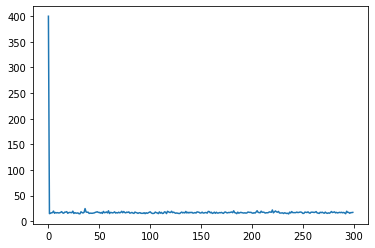

In [12]:
losses = np.array(losses)
losses = losses.reshape((-1))
plt.plot(losses)
plt.show()

In [13]:
w,b = mysvm.w, mysvm.b
print(w,b)

[[-0.4264973  -1.83725756]] 0.40700000000000025


In [30]:
def plothyperplane(w1, w2, b):
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    plt.plot(x1,xp)
    plt.plot(x1,x2)
    plt.plot(x1,xn)
    plt.scatter(x[:,0], x[:,1], c=y)
    plt.show()

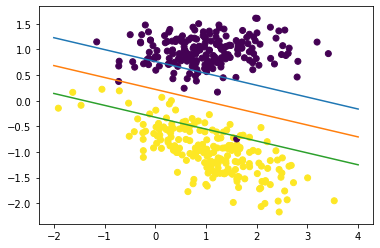

In [31]:
plothyperplane(w[0,0], w[0,1],b)

In [16]:
ids = np.arange(100)
ids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
np.random.shuffle(ids)
ids

array([11,  2, 82, 15, 52, 19, 23, 92, 35, 96, 67, 83, 54, 38, 59, 75,  4,
       21, 49, 68, 51, 69, 16, 34, 44, 86,  1, 64, 97, 81, 80, 70, 79, 13,
       31, 62, 41, 33, 94, 78, 89, 60, 77,  7, 88, 65, 90, 55, 10, 26, 43,
       24,  8,  3, 28,  6, 22, 36, 76,  0,  5, 32, 50, 74, 91, 57, 29, 46,
       45, 20, 63, 56, 48, 42, 84, 14, 73,  9, 18, 85, 40, 93, 25, 72, 37,
       39, 71, 58, 99, 53, 27, 98, 30, 61, 87, 47, 12, 95, 66, 17])